In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns
torch.cuda.empty_cache()

In [ ]:
my_set = [0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.99]

for element in my_set:
    print(element)


0.01
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
0.99


In [ ]:
# Define Gaussian Mixture Model function
def sample_gmm(K, weights, means, covs, M):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    weights = torch.tensor(weights, device=device)
    means = [torch.tensor(mean, device=device) for mean in means]
    covs = [torch.tensor(cov, device=device) for cov in covs]
    normal_distributions = [torch.distributions.MultivariateNormal(mean, cov) for mean, cov in zip(means, covs)]
    categorical_distribution = torch.distributions.Categorical(weights)
    samples = []
    scores = []
    for _ in range(M):
        component_idx = categorical_distribution.sample()
        sample = normal_distributions[component_idx].sample()
        samples.append(sample)
    return torch.stack(samples)


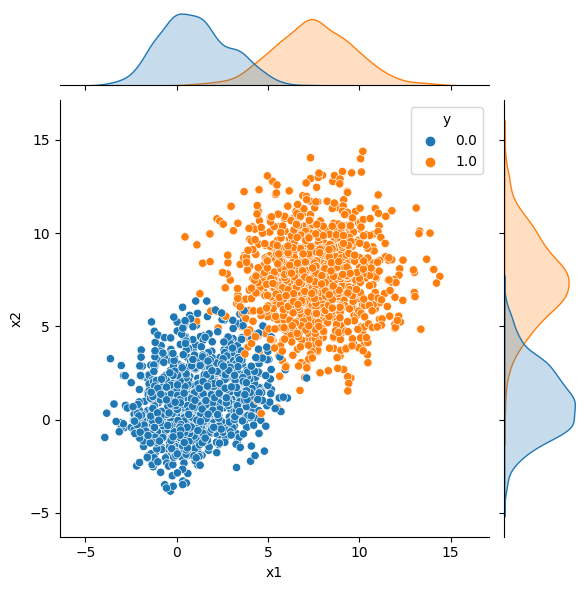

In [ ]:
def generate_binary_dataset(y0_params, y1_params):
  samples_y0 = sample_gmm(y0_params['K'], y0_params['weights'], y0_params['means'],
                          y0_params['covs'], y0_params['M']).numpy()
  samples_y1 = sample_gmm(y1_params['K'], y1_params['weights'], y1_params['means'],
                          y1_params['covs'], y1_params['M']).numpy()
  d = {'x1':np.concatenate([samples_y0[:, 0],samples_y1[:, 0]]) ,
      'x2':np.concatenate([samples_y0[:, 1], samples_y1[:, 1]]),
      'y':np.concatenate([np.zeros_like(samples_y0[:, 1]), np.ones_like(samples_y1[:, 1])])}
  data = pd.DataFrame(data=d)
  return data.sample(frac=1)


M1 = 1000
# For Y=0: Define parameters for Gaussian Mixture Model
y0_params = {'K':2, 'weights':[0.5, 0.5], 'means':[[0., 0.], [2., 2.]],
                'covs': [[[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]], 'M': M1}

# For Y=0: Define parameters for Gaussian Mixture Model
y1_params = {'K':2, 'weights':[0.5, 0.5], 'means':[[7., 7.], [8., 8.]],
                'covs': [[[4., 0.], [0., 4.]], [[5., 0.], [0., 5.]]], 'M': M1}

data_s = generate_binary_dataset(y0_params, y1_params)

sns.jointplot(data=data_s, x="x1", y="x2", hue="y")

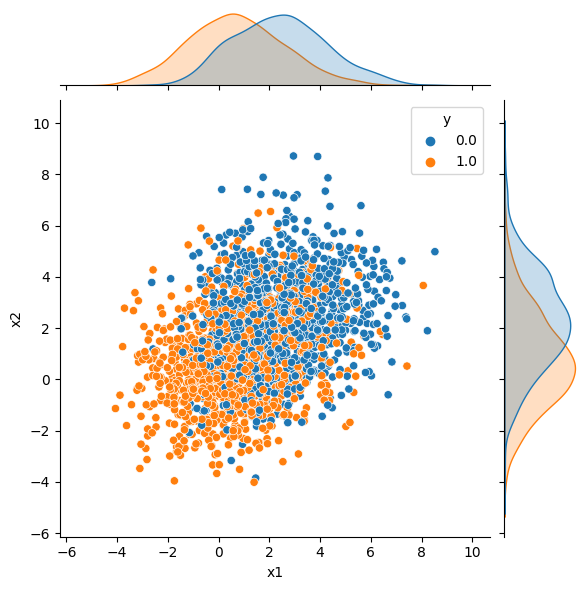

In [ ]:
def generate_binary_dataset(y0_params, y1_params):
  samples_y0 = sample_gmm(y0_params['K'], y0_params['weights'], y0_params['means'],
                          y0_params['covs'], y0_params['M']).numpy()
  samples_y1 = sample_gmm(y1_params['K'], y1_params['weights'], y1_params['means'],
                          y1_params['covs'], y1_params['M']).numpy()
  d = {'x1':np.concatenate([samples_y0[:, 0],samples_y1[:, 0]]) ,
      'x2':np.concatenate([samples_y0[:, 1], samples_y1[:, 1]]),
      'y':np.concatenate([np.zeros_like(samples_y0[:, 1]), np.ones_like(samples_y1[:, 1])])}
  data = pd.DataFrame(data=d)
  return data.sample(frac=1)


M1 = 1000
# For Y=0: Define parameters for Gaussian Mixture Model
y0_params = {'K':2, 'weights':[0.3, 0.7], 'means':[[1., 1.], [3., 3.]],
                'covs': [[[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]], 'M': M1}

# For Y=0: Define parameters for Gaussian Mixture Model
y1_params = {'K':2, 'weights':[0.6, 0.4], 'means':[[0., 0.], [2., 2.]],
                'covs': [[[2., 0.], [0., 2.]], [[3., 0.], [0., 3.]]], 'M': M1}

data_t = generate_binary_dataset(y0_params, y1_params)

sns.jointplot(data=data_t, x="x1", y="x2", hue="y")

In [ ]:
datas = np.array(data_s)
datat = np.array(data_t)
datas = torch.tensor(datas)
datat = torch.tensor(datat)

In [ ]:
# Create the dataset
# data = [[0.5, 0.3], [0.2, 0.8], [0.1, 0.4], [0.9, 0.7], [0.3, 0.6]]
# labels = [0, 0, 0, 1, 1]
data1 = datas[:100,:2]
labels1 = datas[:100,2]
dataset1 = TensorDataset(torch.tensor(data1, dtype=torch.float32), torch.tensor(labels1, dtype=torch.float32))

data2 = datat[1000:1010,:2]
labels2 = datat[1000:1010,2]
dataset2 = TensorDataset(torch.tensor(data2, dtype=torch.float32), torch.tensor(labels2, dtype=torch.float32))

test_data = datat[1180:1200,:2]
test_labels = datat[1180:1200,2]
test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32), torch.tensor(test_labels, dtype=torch.float32))


# Create the data loader
dataloader1 = DataLoader(dataset1, batch_size=16, shuffle=True)
dataloader2 = DataLoader(dataset2, batch_size=16, shuffle=True)
dataloader3 = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Initialize the model
#model = ThreeLayerNet(input_size, hidden_size, output_size)
#model = OneLayerNet(input_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = optim.SGD(Net.parameters(),lr=learning_rate)

<ipython-input-7-ac5279fbc1df>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset1 = TensorDataset(torch.tensor(data1, dtype=torch.float32), torch.tensor(labels1, dtype=torch.float32))
<ipython-input-7-ac5279fbc1df>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset2 = TensorDataset(torch.tensor(data2, dtype=torch.float32), torch.tensor(labels2, dtype=torch.float32))
<ipython-input-7-ac5279fbc1df>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32), torch

In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.001
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []

for train_iteration in range(num_train_iterations):
  model = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model(data2)
    loss = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses0 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies0 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:
#plt.plot( result0, label="Source train")
#plt.plot( result00, label="Source test")
plt.plot(avg_losses0, label="Target-Train")
plt.plot(avg_accuracies0, label="Target-Test Accuracy")

plt.xlabel(r"Iteration", fontsize=16)
plt.ylabel(r"Accuracy", fontsize=16)
plt.title("")
plt.legend(loc="lower left")
#plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model0 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model0.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model0(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model0(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.001
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model0(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses00 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies00 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model1 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model1.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model1(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model1(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.1
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model1(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses1 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies1 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model2 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model2.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model2(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model2(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.2
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model2(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses2 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies2 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model3 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model3.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model3(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model3(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.3
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model3(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses3 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies3 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model4 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model4.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model4(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model4(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.4
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model4(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses4 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies4 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model5 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model5.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model5(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model5(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.5
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model5(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses5 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies5 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model6 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model6.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model6(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model6(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.6
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model6(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses6 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies6 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model7 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model7.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model7(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model7(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.7
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model7(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses7 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies7 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model8 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model8.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model8(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model8(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.8
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model8(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses8 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies8 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model9 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model9.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model9(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model9(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.9
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model9(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses9 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies9 = torch.mean(torch.tensor(accuracies1), dim=0)



In [ ]:

torch.manual_seed(42)
# Define the neural network architecture
class ThreeLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ThreeLayerNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.sigmoid(self.fc3(x))
    return x

# Set the hyperparameters
input_size = 2
hidden_size = 8
output_size = 1
learning_rate = 0.01
num_epochs = 2000
num_train_iterations = 20
# Create the model
losses1 = []
accuracies1 = []


for train_iteration in range(num_train_iterations):
  model10 = ThreeLayerNet(input_size, hidden_size, output_size)
  loss_values = []
  accuracy_values = []

# Define the optimizer for both model parameters, alpha, and beta
#alpha = torch.rand(1, requires_grad=True)  # Initialize alpha as an optimization variable
#beta = torch.rand(1, requires_grad=True)  # Initialize beta as an optimization variable
#m = torch.rand(1, requires_grad=True)
# Define the optimizer for both model parameters and alpha
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
#optimizer = optim.SGD([{'params': [alpha], 'lr': learning_rate}  # alpha and beta as optimization variables
#], lr=learning_rate)
 #  {'params': model.parameters()}, {'params': [torch.rand(1, requires_grad=True)], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)
  optimizer=optim.SGD(model10.parameters(), lr=0.01)


#optimizer = optim.SGD([
#    {'params': model.parameters()},
#    {'params': [alpha], 'lr': learning_rate}  # alpha as an optimization variable
#], lr=learning_rate)


# Train the model and optimize alpha
  for epoch in range(num_epochs):
    outputs = model10(data1)
    loss_1 = criterion(outputs.squeeze(), labels1.squeeze(-1))

    outputs = model10(data2)
    loss_2 = criterion(outputs.squeeze(), labels2.squeeze(-1))

     #alpha = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #beta = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
     #m = optimizer.param_groups[1]['params'][0]  # Retrieve the alpha parameter from optimizer
    alpha=0.99
    loss = alpha * loss_1 + (1 - alpha) * loss_2
  #loss = len(labels2)*(alpha/(beta*m)) * loss_2 + len(labels1)*((1 - alpha)/((1-beta)*m)) * loss_1
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #loss_values.append(loss.detach().numpy())
    loss_values.append(loss.item())
    with torch.no_grad():
      predictions = model10(test_data)
    #torch.tensor(test_data, dtype=torch.float32)
      true_predictions=0
      for i, pred in enumerate(predictions):
        term = 1 if pred >= 0.5 else 0
        if term == test_labels[i]:
          true_predictions += 1
      accuracy_values.append(true_predictions/len(test_labels))
    # Print the loss and alpha every 100 epochs
  losses1.append(loss_values)
  accuracies1.append(accuracy_values)

# Calculate average loss and accuracy across all train iterations
# Calculate average loss and accuracy across all train iterations
avg_losses10 = torch.mean(torch.tensor(losses1), dim=0)
avg_accuracies10 = torch.mean(torch.tensor(accuracies1), dim=0)

In [ ]:
#plt.plot( result0, label="Source train")
#plt.plot( result00, label="Source test")
plt.plot(avg_losses0, label="Target-Train")
plt.plot(avg_losses00, label="Train, alpha=0.001")
plt.plot(avg_losses1, label="Train, alpha=0.1")
plt.plot(avg_losses2, label="Train, alpha=0.2")
plt.plot(avg_losses3, label="Train, alpha=0.3")
plt.plot(avg_losses4, label="Train, alpha=0.4")
plt.plot(avg_losses5, label="Train, alpha=0.5")
plt.plot(avg_losses6, label="Train, alpha=0.6")
plt.plot(avg_losses7, label="Train, alpha=0.7")
plt.plot(avg_losses8, label="Train, alpha=0.8")
plt.plot(avg_losses9, label="Train, alpha=0.9")
plt.plot(avg_losses10, label="Train, alpha=0.99")


plt.xlabel(r"Iteration", fontsize=16)
plt.ylabel(r"Accuracy", fontsize=16)
plt.title("")
plt.legend(loc="lower left")
#plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:
#plt.plot( result0, label="Source train")
#plt.plot( result00, label="Source test")
plt.plot(avg_losses0, label="Target-Train")
plt.plot(avg_losses00, label="Train, alpha=0.001")
#plt.plot(avg_losses1, label="Train, alpha=0.1")
plt.plot(avg_losses2, label="Train, alpha=0.2")
#plt.plot(avg_losses3, label="Train, alpha=0.3")
plt.plot(avg_losses4, label="Train, alpha=0.4")
#plt.plot(avg_losses5, label="Train, alpha=0.5")
plt.plot(avg_losses6, label="Train, alpha=0.6")
#plt.plot(avg_losses7, label="Train, alpha=0.7")
plt.plot(avg_losses8, label="Train, alpha=0.8")
#plt.plot(avg_losses9, label="Train, alpha=0.9")
plt.plot(avg_losses10, label="Train, alpha=0.99")


plt.xlabel(r"Iteration", fontsize=16)
plt.ylabel(r"Accuracy", fontsize=16)
plt.title("")
plt.legend(loc="lower left")
#plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()

In [ ]:
#plt.plot( result0, label="Source train")
#plt.plot( result00, label="Source test")
plt.plot(avg_accuracies0, label="Target-Test Accuracy")
plt.plot(avg_accuracies00, label="Test, alpha=0.001")
#plt.plot(avg_accuracies1, label="Test, alpha=0.1")
plt.plot(avg_accuracies2, label="Testn, alpha=0.2")
#plt.plot(avg_accuracies3, label="Test, alpha=0.3")
plt.plot(avg_accuracies4, label="Test, alpha=0.4")
#plt.plot(avg_accuracies5, label="Test, alpha=0.5")
plt.plot(avg_accuracies6, label="Test, alpha=0.6")
#plt.plot(avg_accuracies7, label="Test, alpha=0.7")
plt.plot(avg_accuracies8, label="Test, alpha=0.8")
#plt.plot(avg_accuracies9, label="Test, alpha=0.9")
plt.plot(avg_accuracies10, label="Test, alpha=0.99")


plt.xlabel(r"Iteration", fontsize=16)
plt.ylabel(r"Accuracy", fontsize=16)
plt.title("")
plt.legend(loc="lower left")
#plt.style.use('ggplot')
plt.savefig('books_read.png')
plt.show()